In [2]:
# API for getting cryptocurrency pricing, OHLC and volume data from multiple exchanges
# See https://www.cryptocompare.com/api/ for details

In [65]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [66]:
# Pretty plotting settings
mpl.rcParams['figure.figsize'] = (12, 5)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['font.size'] = 14
mpl.rcParams['patch.edgecolor'] = 'white'
mpl.rcParams['font.family'] = 'StixGeneral'

In [67]:
def history_daily(crypto_1, crypto_2, aggregate=1, exchange=None, all_data=False):
    """
    get histoday = open, high, low, close, volumefrom and volumeto daily historical data
    args:
     crypto_1 - base
     crypto_2 - exch
     exchange = crypto exchange 
     all_data = get full historical data
    returns:
     pd.Dataframe, saved arguments
    """
    saved_args = locals()
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&aggregate={}'\
            .format(crypto_1.upper(), crypto_2.upper(), aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    data = requests.get(url).json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = pd.to_datetime(df['time'],unit='s')
    print (saved_args)
    return df, saved_args

In [68]:
data, saved_args = history_daily('ETH', 'USD', all_data=True, exchange='Kraken')

{'all_data': True, 'exchange': 'Kraken', 'aggregate': 1, 'crypto_2': 'USD', 'crypto_1': 'ETH'}


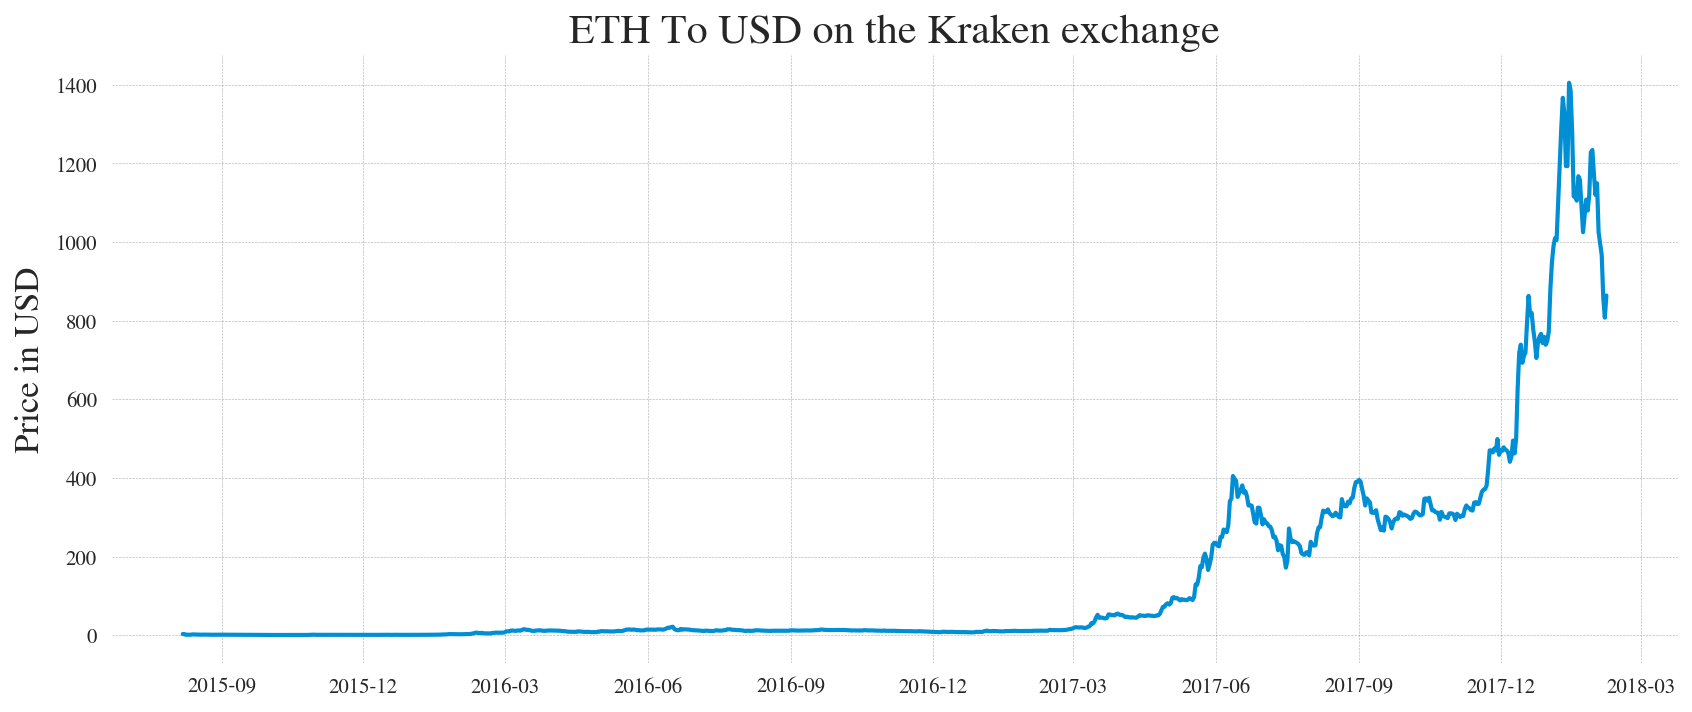

In [77]:
fig, ax  = plt.subplots(1,1)
ax.plot(data.timestamp, data.high)
ax.grid(color='gray', linestyle='--', linewidth=0.3, alpha=.6)
ax.set(title = '{} To {} on the {} exchange'.format(saved_args['crypto_1'], 
                                                    saved_args['crypto_2'],
                                                    saved_args['exchange']),
       ylabel = 'Price in {}'.format(saved_args['crypto_2']));
[s.set_visible(False) for s in ax.spines.values()];